# Naive Bayes


## Bayes' Theorem Intuition

Bayes' theorem describes the probability of an event, based on prior knowledge of conditions that might be related to the event. The formula is given by

\begin{equation}
    P(A|B) = \frac{P(B|A) P(A)}{P(B)}.
\end{equation}

In words, the probability of A (happening) given B, is given by the probability of B given A, multiplied by the probability of A, divided by the probability of B (see Appendix A for the derivation).

As an example, imagine you have two spanner-making machines, $m_1$ and $m_2$, producing:

\begin{equation}
    m_1: 30\,\mathrm{spanners/hr}\\
    m_2: 20\,\mathrm{spanners/hr}
\end{equation}

Of all the produced spanners, we see that 1\% are defective, with 50% labelled with $m_1$ and 50% with $m_2$. What is the probability that that a part produced by $m_2$ is defective?

Firstly, to get this problem in useful notation, the probabilties of an individual spanner coming from either machine are:

\begin{equation}
    P(m_1) = 30/50 = 0.6\\
    P(m_2) = 20/50 = 0.4
\end{equation}

And the overall probability of defect is

\begin{equation}
    P(\mathrm{X}): 30/50 = 0.6
\end{equation}

We also know that the probability of a single spanner being defective given it came from a particular machine is

\begin{equation}
    P(m_1 | \mathrm{X}) = 0.5,\\
    P(m_2 | \mathrm{X}) = 0.5.
\end{equation}

Bayes' theorem tells us that to answer our question:

\begin{equation}
    P(\mathrm{X} | m_2) = \frac{P(m_2 | \mathrm{X}) P(\mathrm{X})}{P(m_2)}.
\end{equation}

I.e. the probability of machine 2 producing a defective spanner is given by the probability of a defective spanner coming from machine 2, multiplied by the probability of a defective spanner being produced, divided by the probability of any spanner coming from machine 2.

Substituting the information we know

\begin{equation}
    P(\mathrm{X} | m_2) = \frac{0.5 \times 0.01}{0.4} = 0.0125 = 1.25\%.
\end{equation}

\begin{equation}
    P(\mathrm{X} | m_2) = \frac{0.5 \times 0.01}{0.6} = 0.00833 = 0.83\%.
\end{equation}

In a frequentist interpretation, we imagine that of 1000 spanners, 400 will be produced by machine 2. Also, 10 of the total are defective, 5 of which came from machine 2. So, the percentage of defective parts is 5/400 = 1.25\%. So Bayes' theorem is quite intuitive.

One may ask why we couldn't just count the number of defective spanners. However, perhaps the initial variables were standard factory metrics, so it's easier to just apply Bayes' theorem. In more complex applications this information must be otherwise obscured.

## Naive Bayes

Imagine we have some labelled data of people who walk or drive to work, as well as some (assumed) independent variables about those people that we think may be relevent to this choice (features), e.g. salary and age. Now assume that a new employee is hired with a known salary and age and we want to predict whether he's going to work ($W$) or drive ($D$).

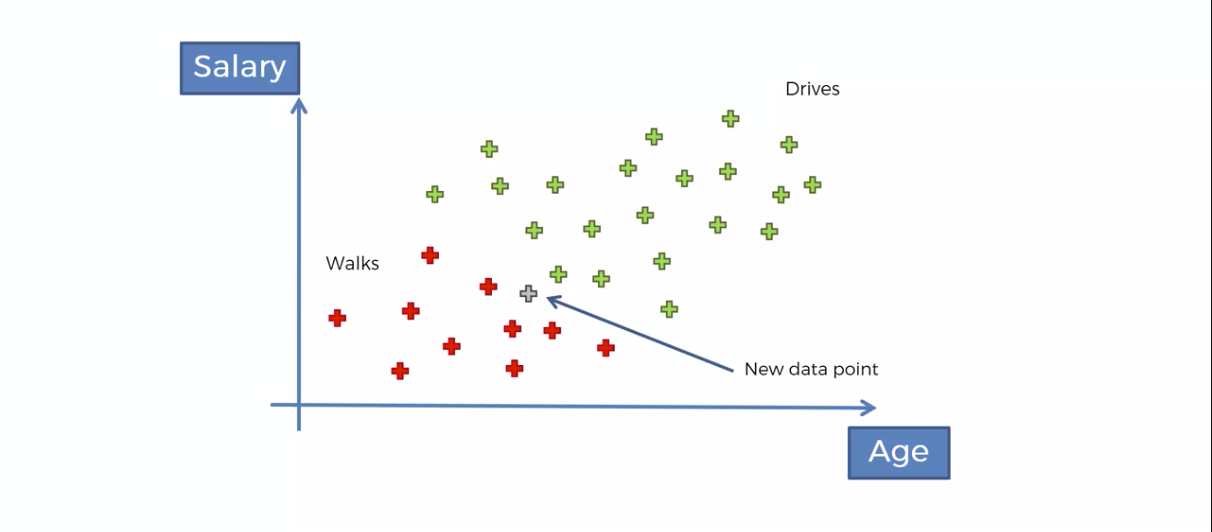

So, given a vector of features $X$, Bayes' theorem states

\begin{align}
    P(W|X) &= \frac{P(X|W) P(W)}{P(X)},\\
    P(D|X) &= \frac{P(X|D) P(D)}{P(X)}.
\end{align}

The following terminology can be used for each variable, given in the table below, along with order in which we should find them.

| Variable       | Name                 | Order to find  |
| -------------- | -------------------- | -------------- |
| $P(D|X)$       | Posterior probabilty | #4             |
| $P(X|D)$       | Likelihood           | #3             |
| $P(D)$         | Prior probability    | #1             |
| $P(X)$         | Marginal likelihood  | #2             |

We want to use this information to find $P(W|X)$ vs $P(D|X)$. Clearly, Naive Bayes' is considered a probabilistic classifier because we're first calculating the probabilites, and then, based on probabilities, we're assigning the class.

Now we'll go through the steps to find a solution for this example.



### Step 1 - Prior probability

What's the probability that someone (anyone in the dataset) walks, regardless of independent variables. Easy, just calculate the number of walkers $N(W)$ divided by the total number of observations ($N$):

\begin{equation}
    P(W) = \frac{N(W)}{N} = \frac{10}{30}
\end{equation}

### Step 2 - Marginal likelihood

To find the marginal likelihood we draw a circle of radius $R$ around the point. $R$ must be selected as an input parameter to the algorithm. We look at all the points inside the radius, which are deemed similar in terms of features to the new point. 

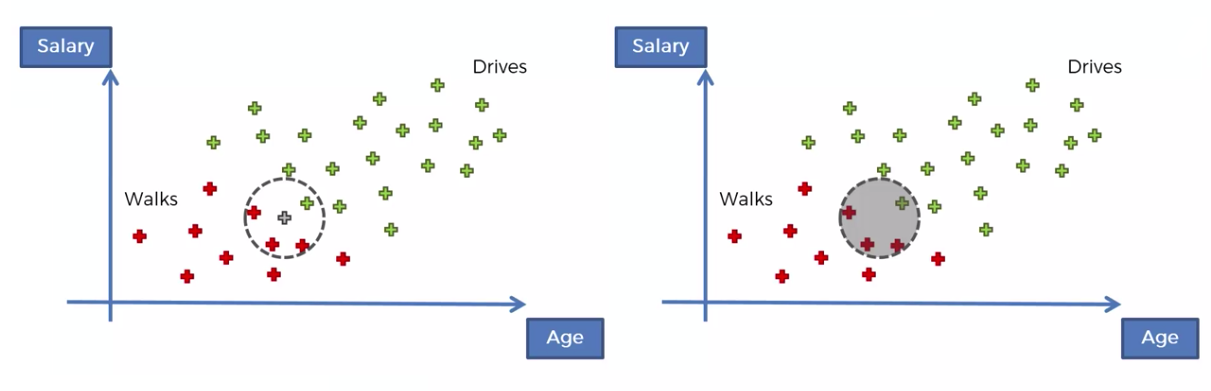

So the marginal likelihood is given by

\begin{equation}
    P(X) = \frac{Number of similar observations}{Total observations}
    P(X) = \facr{4}{30}
    
   






## Appendix A - Derivation of Bayes' theorem

Start with the definition of conditional probability [1]. The probability of event $A$ given event $B$ is

\begin{equation}
    P(A|B) = \frac{P(A \cap B)}{P(B)}
\end{equation}

Likewise, the probability of event $B$ given event $A$ is

\begin{equation}
    P(B|A) = \frac{P(B \cap A)}{P(A)}
\end{equation}

We assume $P(A), P(B) \ne 0$. Rearranging and combining these equations

\begin{equation}
    P(A|B)P(B) = P(A \cap B) = P(B|A)P(A)
\end{equation}

This lemma is sometimes known as the product rule for probabilities. Assuming $P(B)\ne 0$, we can further rearrange for Bayes' theorem,

\begin{equation}
    P(A|B) = \frac{P(B|A) P(A)}{P(B)}.
\end{equation}


## References 

    [1] https://my.eng.utah.edu/~cs5961/Resources/bayes.pdf
    